In [1]:
# The following code implements AlexNet to solve CIFAR-10 image classification problem
# Environments: CPU: Intel Core i7-9700F, GPU: Nvidia GeForce RTX 2070 SUPER, RAM: 16G
# Requirements:Python 3.9, TensorFlow 2.7, NumPy, Matplotlib
# CUDA and cuDNN need to be configured for GPU acceleration

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, Lambda, \
    BatchNormalization, Activation, Resizing, Rescaling
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Check devices to make sure GPU is enabled to speed up training
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
# Load CIFAR-10 data
data = cifar10.load_data()
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
# Split dataset to traning data and testing data
(X_train, y_train), (X_test, y_test) = data

In [6]:
# Check image data information
print(f'X_train has {X_train.shape[0]} images, each image shape is {X_train.shape[1:]}.')
print(f'X_test has {X_test.shape[0]} images, each image shape is {X_test.shape[1:]}.')

X_train has 50000 images, each image shape is (32, 32, 3).
X_test has 10000 images, each image shape is (32, 32, 3).


In [7]:
# Check target label data information
print(f'y_train has {y_train.shape[0]} labels, there are {len(np.unique(y_train))} classes.')
print(f'y_test has {y_test.shape[0]} labels, there are {len(np.unique(y_test))} classes.')

y_train has 50000 labels, there are 10 classes.
y_test has 10000 labels, there are 10 classes.


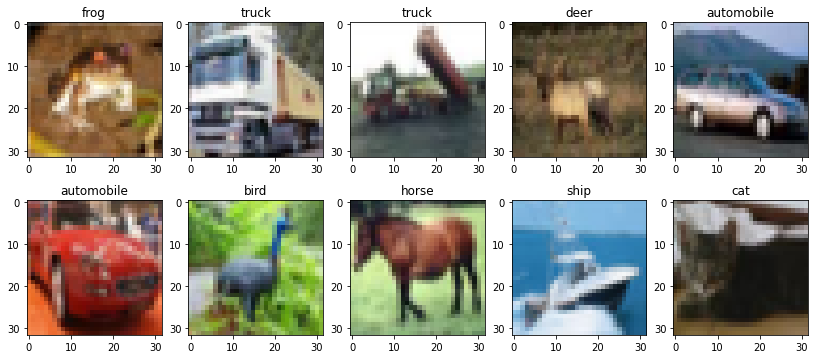

In [8]:
# Plot some training images and check the class labels are correct
%matplotlib inline
plt.figure(figsize=(14, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(classes[int(y_train[i])])

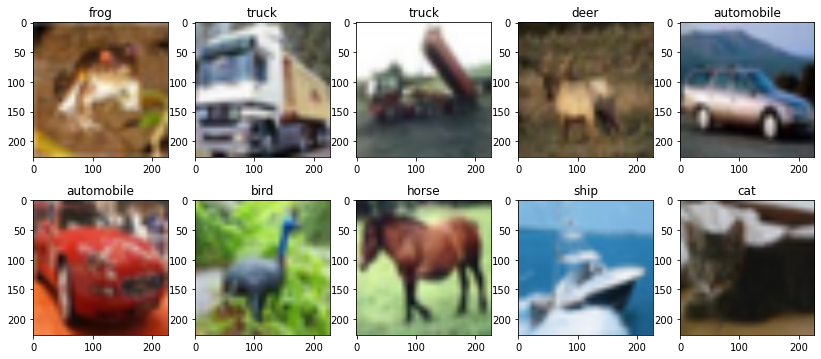

In [9]:
# Plot these images after rescaling and resizing
%matplotlib inline
plt.figure(figsize=(14, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    rescaled = Rescaling(1./255)(X_train[i])
    resized_rescaled = Resizing(227, 227)(rescaled)
    plt.imshow(resized_rescaled)
    plt.title(classes[int(y_train[i])])

In [10]:
# Make categorical variables dummy for training
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [11]:
# Initialise model
model = tf.keras.Sequential()

# Image rescaling and resizing
model.add(Rescaling(1./255))
model.add(Resizing(227, 227))

# AlextNet
model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), input_shape=(227, 227, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=4096))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(units=4096))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(units=10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# Compile AlextNet
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), \
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), \
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [12]:
# Build the model and print model informationa
model.build(input_shape=(None, 32, 32, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 resizing_10 (Resizing)      (None, 227, 227, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                      

In [13]:
fit = model.fit(X_train, y_train_categorical, batch_size=32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 51s 29ms/step - loss: 1.3245 - categorical_accuracy: 0.5398
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9276 - categorical_accuracy: 0.6874
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7513 - categorical_accuracy: 0.7496
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6343 - categorical_accuracy: 0.7888
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.5287 - categorical_accuracy: 0.8239
Epoch 6/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.4364 - categorical_accuracy: 0.8567
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.3516 - categorical_accuracy: 0.8861
Epoch 8/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.2751 - categorical_accuracy: 0.9140
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - 

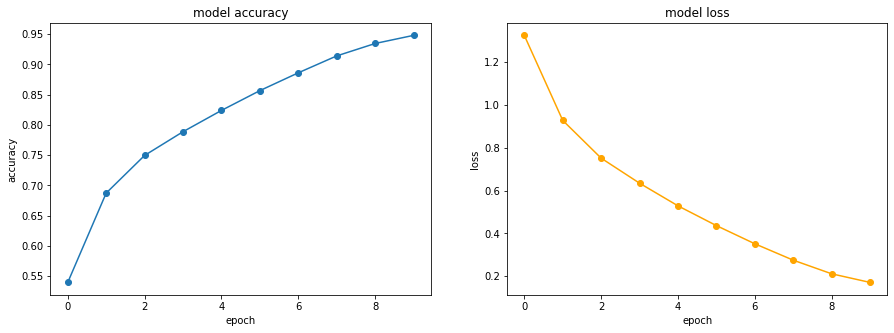

In [14]:
# Plot how model accuracy and loss change during the training porcess
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(fit.history['categorical_accuracy'], marker='o')
plt.subplot(1, 2, 2)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(fit.history['loss'], color='orange', marker='o')
plt.show()

In [15]:
model.evaluate(X_test, y_test_categorical)

313/313 [==============================] - 3s 9ms/step - loss: 0.5683 - categorical_accuracy: 0.8255: 0s - loss: 0.5713 - categorica


[0.5682610869407654, 0.8255000114440918]